<a href="https://colab.research.google.com/github/Riley-Simpson/Postgraduate-Work-/blob/main/CS815_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CS815 Assignment 2: Algorithmic Trading
##Group 26

Members:
*   Riley Simpson
*   Ishita Namdeo




# Import Necessary Libraries

The libraries mentioned are commonly used in R programming for various purposes:

1. **quantmod**: Used for financial quantitative modeling, particularly for financial data analysis, visualization, and modeling tasks such as technical analysis, backtesting trading strategies, and accessing financial data from various sources.

2. **GA (Genetic Algorithms)**: Employed for optimization problems inspired by natural selection and genetics. In finance, it can be used for tasks like portfolio optimization, risk management, and parameter tuning in trading strategies.

3. **TTR (Technical Trading Rules)**: Provides functions to create technical trading rules and indicators, facilitating the analysis of financial market data for the development and evaluation of trading strategies.

4. **ggplot2**: A powerful plotting system for creating visually appealing and informative graphics in R. It's commonly used for data visualization, including financial data visualization to analyze trends, patterns, and relationships.

5. **keras**: A high-level neural networks API, commonly used for building and training deep learning models, including those for time series forecasting, risk assessment, and algorithmic trading strategies in finance.

6. **dplyr**: Part of the tidyverse ecosystem, dplyr provides a set of functions for data manipulation and transformation. It's often used for data preprocessing, cleaning, and summarization tasks, which are crucial in financial data analysis.

7. **magrittr**: Provides a convenient way to pipe R expressions, allowing for more readable and expressive code. It's particularly useful in finance for chaining data manipulation operations together, enhancing code clarity and maintainability.

8. **progress**: Offers functionality to create progress bars in R scripts and functions, which is helpful for tracking the progress of lengthy computations or iterative processes, such as model training or data processing tasks in financial analysis.



In [ ]:
packages <- c("quantmod", "GA", "TTR", "ggplot2", "keras", "dplyr", "magrittr","progress")

for (pkg in packages) {
    if (!require(pkg, character.only = TRUE)) {
        install.packages(pkg)
        library(pkg, character.only = TRUE)
    }
}


Loading required package: quantmod

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘quantmod’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: GA

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘GA’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘foreach’, ‘iterators’, ‘Rcpp’, ‘RcppArmadillo’


Loading required package: foreach

Loading r

# Fetch Stock Data
The data chosen for analysis was the graphics card manufacturer [NVIDA](https://finance.yahoo.com/quote/NVDA/) .

NVIDIA is prominent in the technology sector, particularly in GPUs and AI. Its products span gaming, data centers, and automotive industries, offering a diverse landscape for analysis. Moreover, NVIDIA's stock has shown volatility, presenting opportunities to study trends and patterns effectively.

[1] "NVDA"

           NVDA.Open NVDA.High NVDA.Low NVDA.Close NVDA.Volume NVDA.Adjusted
2022-01-03    298.15    307.11   297.85     301.21    39154700      300.7810
2022-01-04    302.77    304.68   283.49     292.90    52715400      292.4829
2022-01-05    289.49    294.16   275.33     276.04    49806400      275.6469
2022-01-06    276.40    284.38   270.65     281.78    45418600      281.3787
2022-01-07    281.41    284.22   270.57     272.47    40993900      272.0819
2022-01-10    265.81    274.69   256.44     274.00    59468100      273.6098
2022-01-11    273.23    280.65   268.39     278.17    40408900      277.7739
2022-01-12    280.67    285.95   276.08     279.99    38341300      279.5912
2022-01-13    283.79    284.80   264.98     265.75    54017100      265.3716
2022-01-14    263.00    271.97   262.10     269.42    39583200      269.0363
       ...                                                                  
2024-03-22    911.41    947.78   908.34     942.89    58521500      942.8900

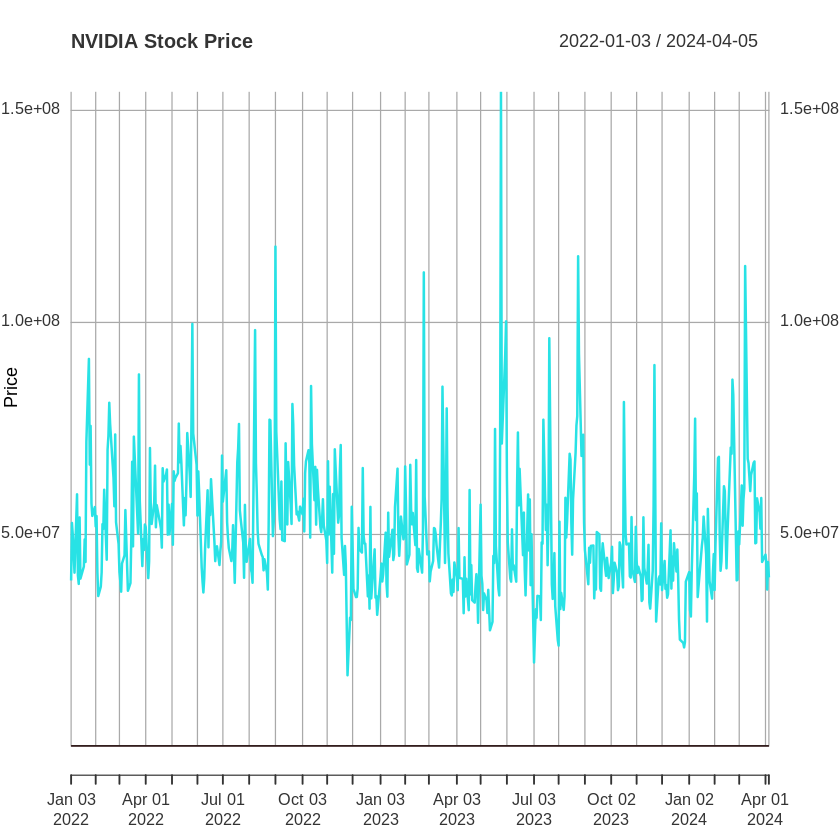

In [ ]:
# Fetch the stock data from Yahoo Finance
getSymbols("NVDA", src = "yahoo", from = "2022-01-01", to = Sys.Date())
data <- NVDA

# Summary plot for the stock data
plot(data, main = "NVIDIA Stock Price", xlab = "Date", ylab = "Price")

print(data)

# Calculating the Technical Indicators

The following technical indicators were chosen to analyze the data:


- [Relative Stength Index (RSI)](https://en.wikipedia.org/wiki/Relative_strength_index) -- This is a momentum oscillator that measures the speed and change of price movements. It is used to identify overbought or oversold conditions in a security, indicating potential buy or sell signals.

- [Moving Average Convergence/Divergence (MACD)](https://en.wikipedia.org/wiki/MACD) -- This is a trend-following momentum indicator that shows the relationship between two moving averages of prices. It is used to identify the direction and strength of the trend in a security, based on the convergence or divergence of the two moving averages.

- [Simple Moving Average(SMA)](https://en.wikipedia.org/wiki/Moving_average#:~:text=smoothing%20the%20data.-,Simple%20moving%20average,-%5Bedit%5D) -- This calculates the average of a security's price over a specified time period, and plots a line on the chart to represent this average. It is used to identify trends and potential support or resistance levels in a security.

- [Exponential Moving Average(EMA)](https://en.wikipedia.org/wiki/Moving_average#:~:text=average%20which%20follows.-,Exponential%20moving%20average,-%5Bedit%5D) -- This is a weighted moving average that assigns greater importance to recent data points. It is used to identify trends and potential support or resistance levels in a security, and is often used in conjunction with other technical indicators.

[(Source: TTR Documentation)](https://ttrthomas.github.io/Trading-Technical-Indicators/)

In [ ]:
# Calculate RSI and add it as a column to the data dataframe
data$RSI <- RSI(Cl(data), n = 14)

# Do the same for MACD, SMA, and EMA
data$MACD <- MACD(Cl(data), nFast = 12, nSlow = 26)$macd
data$Signal <- MACD(Cl(data), nFast = 12, nSlow = 26)$signal
data$SMA20 <- SMA(Cl(data), n = 20)
data$EMA20 <- EMA(Cl(data), n = 20)

print(data)

           NVDA.Open NVDA.High NVDA.Low NVDA.Close NVDA.Volume NVDA.Adjusted
2022-01-03    298.15    307.11   297.85     301.21    39154700      300.7810
2022-01-04    302.77    304.68   283.49     292.90    52715400      292.4829
2022-01-05    289.49    294.16   275.33     276.04    49806400      275.6469
2022-01-06    276.40    284.38   270.65     281.78    45418600      281.3787
2022-01-07    281.41    284.22   270.57     272.47    40993900      272.0819
2022-01-10    265.81    274.69   256.44     274.00    59468100      273.6098
2022-01-11    273.23    280.65   268.39     278.17    40408900      277.7739
2022-01-12    280.67    285.95   276.08     279.99    38341300      279.5912
2022-01-13    283.79    284.80   264.98     265.75    54017100      265.3716
2022-01-14    263.00    271.97   262.10     269.42    39583200      269.0363
       ...                                                                  
2024-03-22    911.41    947.78   908.34     942.89    58521500      942.8900

# Plotting Technical Indicators

Warning message:
“Removed 14 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 25 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 33 rows containing missing values (`geom_line()`).”


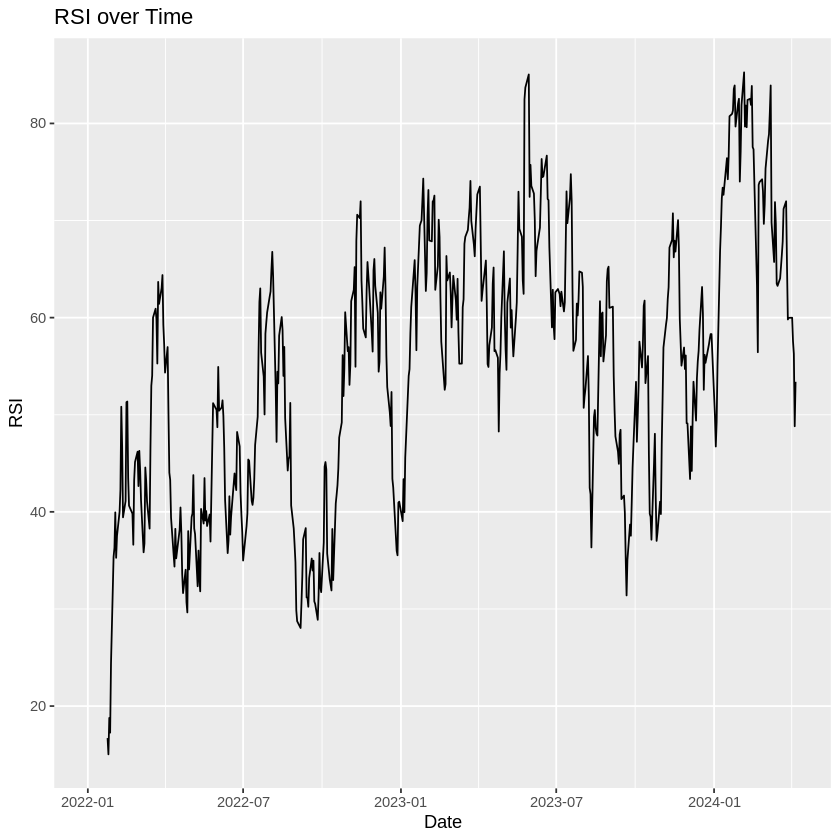

Warning message:
“Removed 19 rows containing missing values (`geom_line()`).”


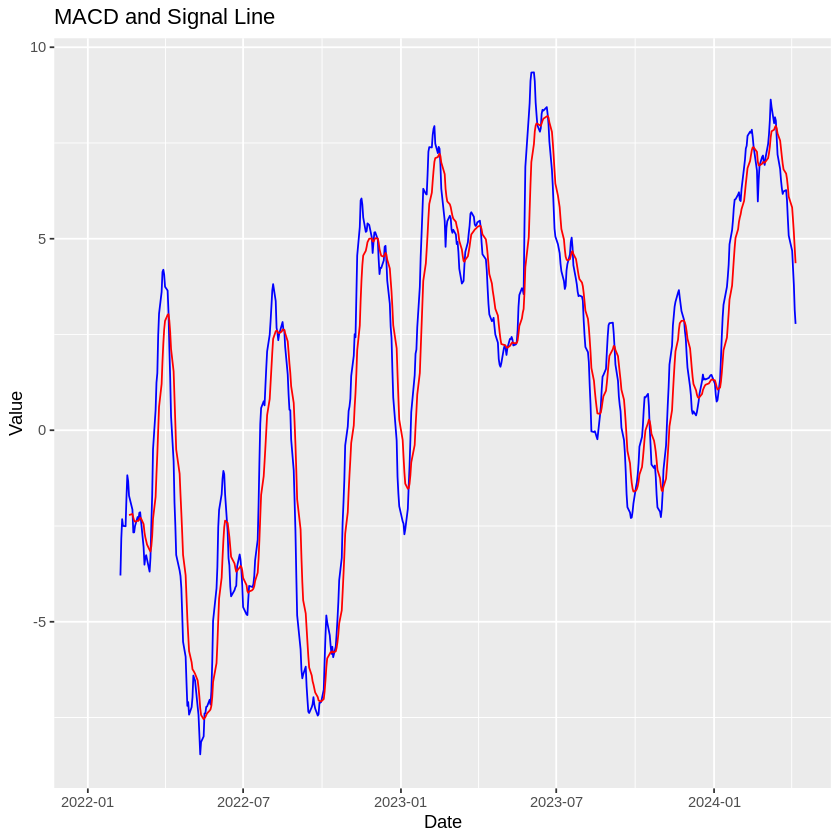

Warning message:
“Removed 19 rows containing missing values (`geom_line()`).”


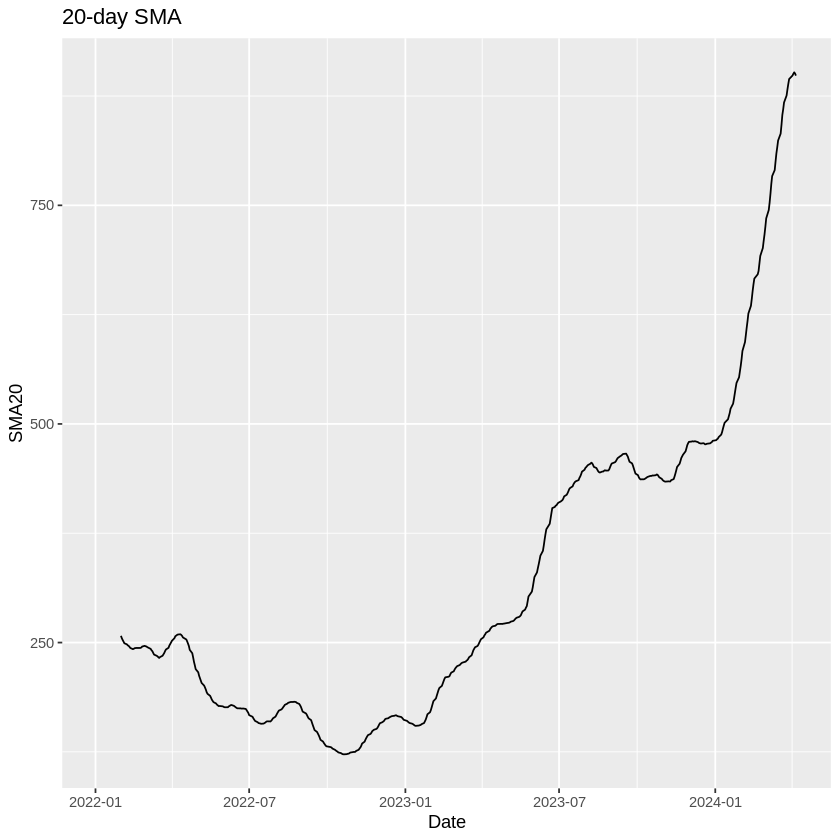

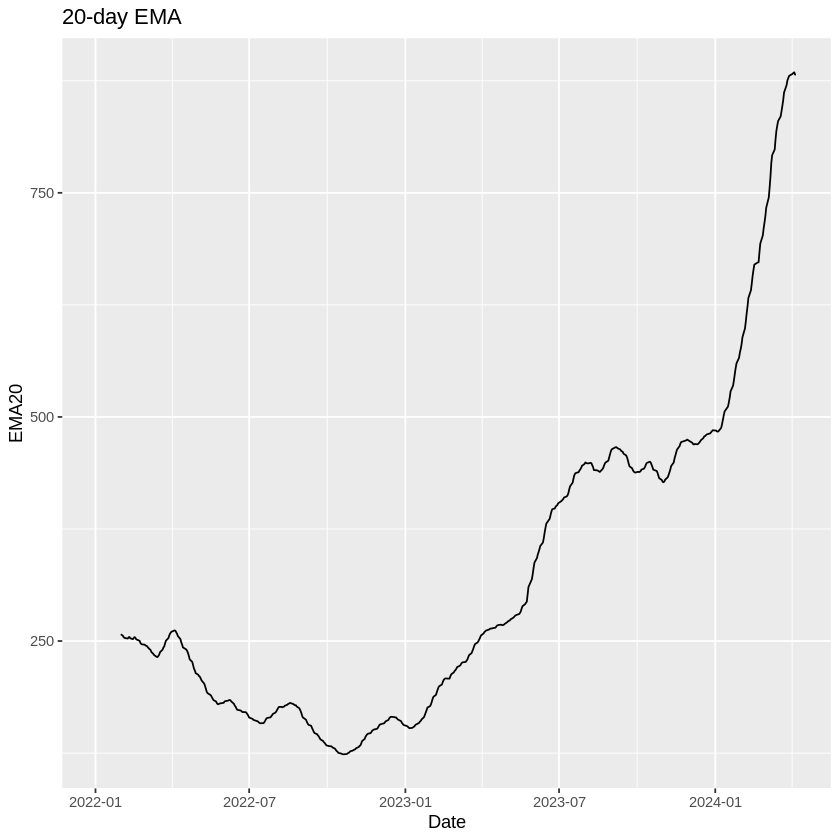

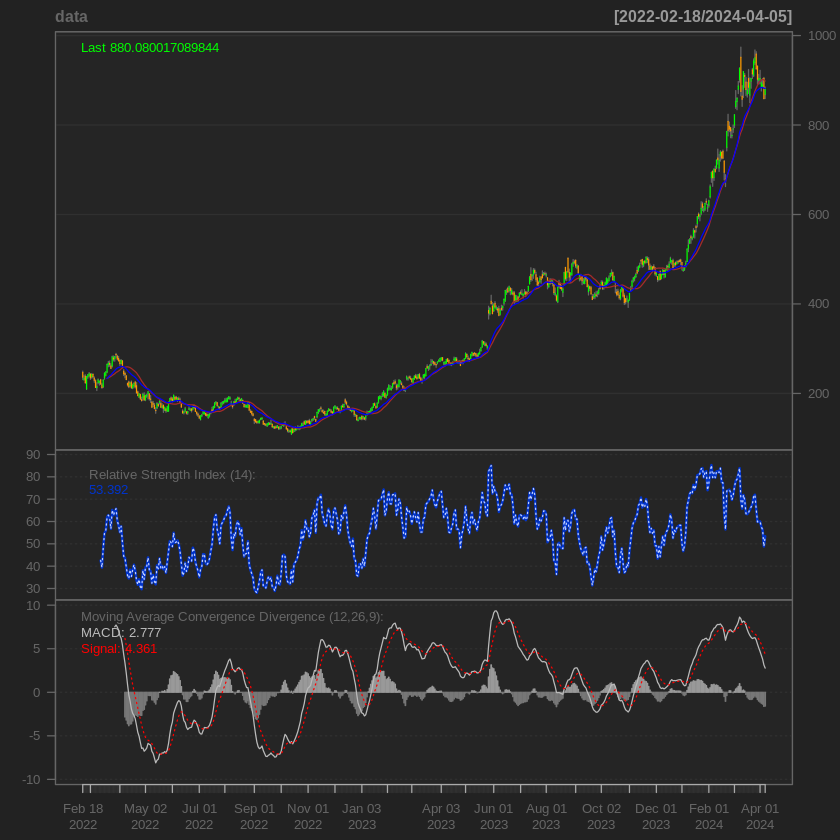

In [ ]:
ggplot(data, aes(x = index(data), y = RSI)) +
    geom_line() +
    labs(title = "RSI over Time", x = "Date", y = "RSI")

ggplot(data) +
    geom_line(aes(x = index(data), y = MACD), color = "blue") +
    geom_line(aes(x = index(data), y = Signal), color = "red") +
    labs(title = "MACD and Signal Line", x = "Date", y = "Value")

ggplot(data, aes(x = index(data), y = SMA20)) +
    geom_line() +
    labs(title = "20-day SMA", x = "Date", y = "SMA20")

ggplot(data, aes(x = index(data), y = EMA20)) +
    geom_line() +
    labs(title = "20-day EMA", x = "Date", y = "EMA20")

chartSeries(data, TA = "addRSI();addMACD();addSMA(n=20);addEMA(n=20)")



## Data Pre-Processing
We removed any rows with missing values (NA) from the dataset. We then normalized the data using the *scale()* function, which standardizes the data to have a mean of 0 and a standard deviation of 1.




### Splitting the Data
Moving the train/test split to a later stage in the pipeline made it easier to manipulate and visualize the data. By splitting the data after preprocessing and feature engineering, it was possible to have a clearer view of the data and ensure that the training and testing sets were representative of the problem.

In [ ]:
# Remove rows with NA values
data <- na.omit(data)

original_data <- data


# Standardize the data using the scale function
# The scale function automatically standardizes the data (mean = 0, sd = 1)
data_standardized <- scale(data)

# (Optional) Check if the data is standardized properly
mean_check <- apply(data_standardized, 2, mean, na.rm = TRUE)
sd_check <- apply(data_standardized, 2, sd, na.rm = TRUE)

#print(mean_check)
#print(sd_check)

# Using previous day's data to predict next day's close price
features <- data_standardized[-nrow(data),]  # All rows except last
labels <- Cl(data_standardized)[-1]  # Close price, starting from second row



train_size <- floor(0.8 * nrow(features))
X_train <- features[1:train_size, ]
Y_train <- labels[1:train_size]
X_test <- features[(train_size+1):nrow(features), ]
Y_test <- labels[(train_size+1):length(labels)]

# Create copies of X_test and Y_test for trading simulations
X_test_original <- original_data[(train_size+1):nrow(original_data), ]
Y_test_original <- Cl(original_data)[(train_size+1):length(labels)]



## Build Neural Network



During the program implementation, it was observed that using multiple fitness functions in the genetic algorithm (GA) was time-consuming and computationally expensive. Therefore, it was decided to switch to a neural network (NN) approach instead. The NN provided a more efficient and straightforward way to train the model and make predictions.

## Grid Search
In order to increase the model's performance without altering it's architecture we can perform a grid search on it's hyper-parameters including the number of units in the dense layers, the activation function, and the batch size.

The best model is selected based on the mean absolute error **MAE** metric.

(The idea to use grid search for this project was inspired from
[here](https://link.springer.com/article/10.1007/s40745-020-00305-w))


In [ ]:
# Define the hyperparameter grid
hyperparameters <- list(
  units = c(32, 64, 128),  # Different numbers of units for dense layers
  activation = c('relu', 'tanh','PReLU','softmax','LeakyReLU'),  # Different activation functions
  batch_size = c(32, 64)  # Different batch sizes
)

# Create a list to store the results
results <- list()

# Initialize variables to track the best model and its performance
best_model <- NULL
best_performance <- Inf

for (units in hyperparameters$units) {
  for (activation in hyperparameters$activation) {
    for (batch_size in hyperparameters$batch_size) {

      # =================Define and compile the model=================
      model <- keras_model_sequential() %>%
        layer_dense(units = units, activation = activation, input_shape = dim(X_train)[2]) %>%
        layer_dense(units = units, activation = activation) %>%
        layer_dense(units = 1)  # Output layer

      model %>% compile(
        loss = 'mean_squared_error',
        optimizer = optimizer_adam(),
        metrics = c('mean_absolute_error')
      )

      # Train the model
      history <- model %>% fit(
        X_train, Y_train,
        epochs = 50,
        batch_size = batch_size,
        validation_split = 0.2,
        verbose = 0  # Optional: set verbose to 0 to suppress training output
      )

      # Evaluate the model
      evaluation <- model %>% evaluate(X_test, Y_test)

      # Store the results
      results[[paste(units, activation, batch_size, sep = '_')]] <- evaluation

      if (evaluation[['mean_absolute_error']] < best_performance) {
        best_performance <- evaluation[['mean_absolute_error']]
        best_model <- model
      }


    }
  }
}

results_df <- do.call(rbind, lapply(names(results), function(key) {
  cbind(Parameter = key, as.data.frame(t(results[[key]])))
}))

results_df_sorted <- results_df[order(results_df$mean_absolute_error), ]
print(results_df_sorted)

# Store the best performing model as 'optimised_model'
optimised_model <- best_model

# Print the best model's performance
print("Best Model Performance:")
print(best_performance)




          Parameter       loss mean_absolute_error
19  64_LeakyReLU_32 0.04995741           0.1711811
30 128_LeakyReLU_64 0.05290503           0.1861303
24      128_tanh_64 0.19753830           0.2951714
13       64_tanh_32 0.22679752           0.3184172
23      128_tanh_32 0.26468271           0.3335399
10  32_LeakyReLU_64 0.17315900           0.3524301
14       64_tanh_64 0.27951241           0.3647474
29 128_LeakyReLU_32 0.24716426           0.4247025
3        32_tanh_32 0.44216028           0.4638247
9   32_LeakyReLU_32 0.26163077           0.4645481
4        32_tanh_64 0.49454784           0.4890684
22      128_relu_64 0.37063485           0.5377601
20  64_LeakyReLU_64 0.42342597           0.5750864
25     128_PReLU_32 0.55629414           0.6529581
15      64_PReLU_32 0.58587009           0.6849961
26     128_PReLU_64 0.61599660           0.6906189
6       32_PReLU_64 0.65412647           0.6986284
12       64_relu_64 0.63115591           0.7001282
2        32_relu_64 0.59151345 

The output shows the results of the grid search, sorted by the MAE. The best model has a MAE of **0.1711811** with the following hyperparameters, which is achieved with 64 units in the dense layers, the LeakyReLU activation function, and a batch size of 32.


This means that the predicted values are on average **0.1711811** units away from the actual values. The other combinations of hyperparameters have higher MAE values, indicating worse performance.

## Trading Strategy

The trading strategy used in this code is a combination of a neural network model and multiple technical indicators. The neural network model is trained to predict the next day's closing price based on the previous day's data.

The technical indicators used in this strategy include the Relative
*   Strength Index (RSI)
*   Moving Average Convergence Divergence (MACD)
*   Exponential Moving Average (EMA)
*   Simple Moving Average (SMA)




In [ ]:
# Predictions from the model
predictions <- optimised_model %>% predict(X_test)

# Initialize variables for tracking profit/loss
capital <- 10000  # Initial capital
initial_value <- capital
shares <- 0       # Initial number of shares

close_prices <- as.vector(X_test_original$NVDA.Close)
RSI <- as.vector(X_test_original$RSI)
MACD <- as.vector(X_test_original$MACD)
SMA20 <- as.vector(X_test_original$SMA20)
EMA20 <- as.vector(X_test_original$EMA20)
trade_decision <- ifelse(predictions > X_test[,"NVDA.Close"], "Buy",
                         ifelse(predictions < X_test[,"NVDA.Close"], "Sell", "Hold"))

# Define the percentages for buying and selling
percentage_to_buy <- 0.5  # Example: buy 50% of available capital
percentage_to_sell <- 0.5  # Example: sell 50% of shares if sell decision is made

# Simulate trades
for (i in 1:length(predictions)) {
  # Weighted decision based on multiple technical indicators and the NN trading decision
  weighted_decision <- ifelse(RSI[i] < 30 | MACD[i] > 0 | close_prices[i] > SMA20[i] | close_prices[i] > EMA20[i] | trade_decision[i] == "Buy", "Buy",
                               ifelse(RSI[i] > 70 | MACD[i] < 0 | close_prices[i] < SMA20[i] | close_prices[i] < EMA20[i] | trade_decision[i] == "Sell", "Sell", "Hold"))

  if (weighted_decision == "Buy" && capital >= close_prices[i]) {
    # Calculate the amount of capital to allocate for buying
    amount_to_buy <- capital * percentage_to_buy

    # Calculate the number of shares to buy
    num_shares_to_buy <- floor(amount_to_buy / close_prices[i])

    # Update shares owned and remaining capital
    shares <- shares + num_shares_to_buy
    capital <- capital - num_shares_to_buy * close_prices[i]
    print(paste("Bought", num_shares_to_buy, "shares at price", close_prices[i]))
  } else if (weighted_decision == "Sell" && shares > 0) {
    # Calculate the number of shares to sell
    num_shares_to_sell <- ceiling(shares * percentage_to_sell)

    # Execute Sell trade for the calculated number of shares
    capital <- capital + num_shares_to_sell * close_prices[i]
    shares <- shares - num_shares_to_sell
    print(paste("Sold", num_shares_to_sell, "shares at price", close_prices[i]))
  }
}

# Calculate final profit/loss
final_value <- capital + shares * close_prices[length(close_prices)]
profit_loss <- final_value - initial_value

# Print profit/loss
print(paste("Profit/Loss:", profit_loss))


[1] "Bought 11 shares at price 435.059997558594"
[1] "Bought 5 shares at price 450.049987792969"
[1] "Bought 3 shares at price 457.510009765625"
[1] "Bought 1 shares at price 459.549987792969"
[1] "Bought 1 shares at price 465.739990234375"
[1] "Bought 0 shares at price 469.5"
[1] "Bought 0 shares at price 483.350006103516"
[1] "Bought 0 shares at price 486.200012207031"
[1] "Bought 0 shares at price 496.559997558594"
[1] "Bought 0 shares at price 488.880004882812"
[1] "Bought 0 shares at price 494.799987792969"
[1] "Bought 0 shares at price 492.980010986328"
[1] "Bought 0 shares at price 504.089996337891"
[1] "Bought 0 shares at price 499.440002441406"
[1] "Bought 0 shares at price 487.160003662109"
[1] "Bought 0 shares at price 477.760009765625"
[1] "Bought 0 shares at price 482.420013427734"
[1] "Bought 0 shares at price 478.209991455078"
[1] "Bought 0 shares at price 481.399993896484"
[1] "Bought 0 shares at price 467.700012207031"
[1] "Bought 0 shares at price 467.649993896484"
[1

The trading strategy calculates the amount of capital to allocate for buying and the number of shares to buy/sell based on the available capital and the percentages to buy/sell.

The final **profit/loss** calculated at the end of the simulation was **9147.95043945312**.